# 특정 키워드로 word2Vec 단어 유사도 보기


## Word2Vec(Word Embedding to Vector)

컴퓨터는 숫자만 인식할 수 있고 한글, 이미지는 바이너리 코드로 저장 됩니다.

* one hot encoding(예 [0000001000]) 혹은 Bag of Word에서 vector size가 매우 크고 sparse 하므로 neural net 성능이 잘 나오지 않습니다.
* `주위 단어가 비슷하면 해당 단어의 의미는 유사하다` 라는 아이디어
* 단어를 트레이닝 시킬 때 주위 단어를 label로 매치하여 최적화
* 단어를 `의미를 내포한 dense vector`로 매칭 시키는 것

* Word2Vec은 분산 된 텍스트 표현을 사용하여 개념 간 유사성을 봅니다. 
* 예를 들어, 파리와 프랑스가 베를린과 독일이 (수도와 나라) 같은 방식으로 관련되어 있음을 이해합니다.

![word2vec](https://1.bp.blogspot.com/-Q7F8ulD6fC0/UgvnVCSGmXI/AAAAAAAAAbg/MCWLTYBufhs/s1600/image00.gif)
이미지 출처 : https://opensource.googleblog.com/2013/08/learning-meaning-behind-words.html

* 단어의 임베딩과정을 실시간으로 시각화 : [word embedding visual inspector](https://ronxin.github.io/wevi/)


![CBOW와 Skip-Gram](https://i.imgur.com/yXY1LxV.png)
출처 : https://arxiv.org/pdf/1301.3781.pdf
 Tomas Mikolov, Ilya Sutskever, Kai Chen, Greg Corrado, and Jeffrey Dean. Distributed Representations of Words and Phrases and their Compositionality. In Proceedings of NIPS, 2013.


* CBOW와 Skip-Gram기법이 있다.

    * CBOW(continuous bag-of-words)는 전체 텍스트로 하나의 단어를 예측하기 때문에 작은 데이터셋일 수록 유리하다.    
    * 아래 예제에서 __ 에 들어갈 단어를 예측한다.
<pre>
1) __가 맛있다. 
2) __를 타는 것이 재미있다. 
3) 평소보다 두 __로 많이 먹어서 __가 아프다.
</pre>

    * Skip-Gram은 타겟 단어들로부터 원본 단어를 역으로 예측하는 것이다. CBOW와는 반대로 컨텍스트-타겟 쌍을 새로운 발견으로 처리하고 큰 규모의 데이터셋을 가질 때 유리하다.
    * `배`라는 단어 주변에 올 수 있는 단어를 예측한다.
    
    <pre>
    1) *배*가 맛있다. 
    2) *배*를 타는 것이 재미있다. 
    3) 평소보다 두 *배*로 많이 먹어서 *배*가 아프다.
    </pre>



## Word2Vec 참고자료
* [word2vec 모델 · 텐서플로우 문서 한글 번역본](https://tensorflowkorea.gitbooks.io/tensorflow-kr/g3doc/tutorials/word2vec/)
* [Word2Vec으로 문장 분류하기 · ratsgo's blog](https://ratsgo.github.io/natural%20language%20processing/2017/03/08/word2vec/)
* [CS224n: Natural Language Processing with Deep Learning](http://web.stanford.edu/class/cs224n/syllabus.html)
* [Word2Vec Tutorial - The Skip-Gram Model · Chris McCormick](http://mccormickml.com/2016/04/19/word2vec-tutorial-the-skip-gram-model/)

### 논문
* [Efficient Estimation of Word Representations in
Vector Space](https://arxiv.org/pdf/1301.3781v3.pdf)
* [Distributed Representations of Words and Phrases and their Compositionality](http://papers.nips.cc/paper/5021-distributed-representations-of-words-and-phrases-and-their-compositionality.pdf)

## Gensim

* [gensim: models.word2vec – Deep learning with word2vec](https://radimrehurek.com/gensim/models/word2vec.html)
* [gensim: Tutorials](https://radimrehurek.com/gensim/tutorial.html)
* [한국어와 NLTK, Gensim의 만남 - PyCon Korea 2015](https://www.lucypark.kr/docs/2015-pyconkr/)


In [1]:
# !pip install soynlp
!pip show soynlp

Name: soynlp
Version: 0.0.45
Summary: Unsupervised Korean Natural Language Processing Toolkits
Home-page: https://github.com/lovit/soynlp
Author: Lovit
Author-email: soy.lovit@gmail.com
License: UNKNOWN
Location: /Users/corazzon/codes/jupyter/lib/python3.6/site-packages
Requires: psutil, numpy
Required-by: 


In [2]:
# !pip install gensim
!pip show gensim

Name: gensim
Version: 3.2.0
Summary: Python framework for fast Vector Space Modelling
Home-page: http://radimrehurek.com/gensim
Author: Radim Rehurek
Author-email: me@radimrehurek.com
License: UNKNOWN
Location: /Users/corazzon/codes/jupyter/lib/python3.6/site-packages
Requires: numpy, smart-open, six, scipy
Required-by: 


In [3]:
import pandas as pd
import numpy as np
import re

In [4]:
df = pd.read_csv('data/petition.csv', parse_dates=['start', 'end'])

In [5]:
# 관심사별로 텍스트 데이터를 학습시키기 위한 목적도 있지만 전체 텍스트를 돌렸을 때 빠르게 결과를 얻기 위해서 샘플링 하려는 의도도 있습니다.
p = r'.*(P2P|은행|금융|주식|증권|공매도).*'
finance = df[df['title'].str.match(p) |
           df['content'].str.match(p, flags=re.MULTILINE)]
finance.shape

(9876, 8)

In [6]:
finance.head()

,article_id,start,end,answered,votes,category,title,content
7,28,2017-08-19,2017-08-26,0,2137,경제민주화,소액주주를 보호해주십시오,** 존경하옵는 문재인대통령님께\n저는 중국원양자원이라는 KOSPI상장사의 소액 ...
11,32,2017-08-19,2017-09-03,0,30,경제민주화,소액주주 보호를 위해 조사요청 드립니다.,"존경하는 대통령님께,\n코스피 주식종목 중국 원양자원은 현재 계속되는 장** 대표이..."
54,77,2017-08-20,2017-09-04,0,53,교통/건축/국토,"안양시청, 안양지청, 재개발조합 적폐가 심해 수사가 안되고 있습니다. 안양시 지장물...","※지장물관련 국토부의 해석 : 기존 건축물의 철거 공사에 관한 사항의 범위는 전기,..."
68,91,2017-08-20,2017-09-19,0,165,경제민주화,증권 자본시장개정안(상장폐지법 개정안),존경하는 문제인 대통령님께\n먼저 어렵고 힘든 국정운영을 이끄시느라 노고가 많으십니...
100,124,2017-08-20,2017-08-27,0,1,기타,포스코 관련,안녕하십니까?\n최근 뉴스에 주목을 못 받는 뉴스가 있습니다. 아시아경제tv의 포스...


In [7]:
finance.tail()

,article_id,start,end,answered,votes,category,title,content
192176,242610,2018-05-24,2018-06-23,0,0,경제민주화,전기통신 금융사기 피해방지 및 피해금 환급에 관한 특별법 수정,지난 4월 6일 전주지검을 사칭한 사람으로부터 보이스피싱을 당했습니다.\n지난 제 ...
192179,242614,2018-05-24,2018-06-23,0,1,기타,잘못된 법이 억울한 상황을 만들고 있는 것을 고쳐주셔요.,지난 4월 6일 전주지검을 사칭한 사람으로부터 보이스피싱을 당했습니다.\n지난 제 ...
192190,242633,2018-05-24,2018-06-23,0,20401,행정,2009년도 탄생 적폐제도(?) 신속(조기)집행 폐지를 간절히 청원합니다.,2009년도 탄생 적폐제도(?) 신속(조기)집행 폐지를 간절히 청원합니다.\n국민의...
192250,242718,2018-05-24,2018-06-23,0,14,기타,잘못 제정된 법의 피해를 막아주세요.,지난 4월 6일 전주지검을 사칭한 사람으로부터 보이스피싱을 당했습니다.\n지난 제 ...
192307,242801,2018-05-24,2018-06-23,0,7,경제민주화,범죄집단 삼성증권과 삼성바이오로직스 처벌바랍니다.,위조주식 찍어낸 삼성증권\n적자기업을 박근혜와 최순실에 의해 상장한 분식회계의 삼성...


In [8]:
# 샘플로 보고 싶은 인덱스의 번호를 넣어주세요.
sample_index = 192190

In [9]:
sample_title = finance['title'][sample_index]
sample_title

'2009년도 탄생 적폐제도(?) 신속(조기)집행 폐지를 간절히 청원합니다.'

In [10]:
sample_content = finance['content'][sample_index]
sample_content

'2009년도 탄생 적폐제도(?) 신속(조기)집행 폐지를 간절히 청원합니다.\\n국민의 일원으로써, 일선지자체의 공무원으로써,\\n2009년도부터 실시되어 현재까지 시행중인 적폐 제도, 신속(조기,균형) 집행의 폐지를 청원합니다.\\n2008년 리먼사태로 세계 금융위기가 발생하였다는 이유로 2009년도에 시작된 조기집행...\\n(지극히 제 개인적인 생각입니다다만. 지나고 나서 돌아보니, 솔직히 그것 때문에 시작했다고 생각이 들지 않습니다.)\\n어찌되었든, 현재까지 10년동안 그 제도같지 않은 제도가 이름만 달리하면서(조기→균형→신속) 시행되고 있는 것으로 보아,\\n우리 국가는 매년을 급박한 경제위기속에서 신속(조기)집행으로 버티어 내고 있는 중인 것으로 보입니다.\\n또한, 해당 제도 시행의 근거로 제시되는 「상반기 어려운 고용상황 및 거시경제 불안요인 등에 대응」에 따르면, 우리 국가는 금방이라도 부도가 날 지경인 것 같습니다.\\n현재 우리 대한민국은 정말 그러한 상황인가 되묻고 싶습니다.\\n지난 10년동안 각종 폐해와 문제점이 지적되고 있음에도, 도대체 어떤 이유로 현재까지 시행이 되고 있는지 이유를 찾을 수가 없습니다.\\n각종 언론매체 등을 통해 제기된 부작용을 나열하면,\\n“단기간 과다한 공사발주로 부실 설계 우려”,\\n“지자체 이자 수입 감소와 재정 압박 초래”,\\n“발주 후 설계변경이나 중복 집행 등의 예산낭비”,\\n“공사가 단기간에 집중되면서 공사현장에서 인건비나 자재비가 급등”,\\n“획일적 조기집행의 추진은 지방재정 안정성을 저해”,\\n“중앙정부의 예산조기집행은 지방자치와 지방재정 건전성 문제에 위배”\\n등의 문제점이 전문가, 지자체장, 지방의원, 공무원 등에 의해 지속적으로 제기되어 왔습니다.\\n또한 행정안전부에서도 이미 그 폐해, 문제점을 인지하고 있습니다.\\n-2018년도 행정안전부 지방재정 신속집행 추진계획 3페이지\\n○자치단체, 지방의회, 공무원 단체 등에서 신속집행에 대한 문제점* 등을 들어 지속적으로 개선

# 텍스트 데이터 전처리 

In [11]:
def preprocessing(text):
    # 개행문자 제거
    text = re.sub('\\\\n', ' ', text)
    # 특수문자 제거
    # 특수문자나 이모티콘 등은 때로는 의미를 갖기도 하지만 여기에서는 제거했습니다.
    # text = re.sub('[?.,;:|\)*~`’!^\-_+<>@\#$%&-=#}※]', '', text)
    # 한글, 영문, 숫자만 남기고 모두 제거하도록 합니다.
    # text = re.sub('[^가-힣ㄱ-ㅎㅏ-ㅣa-zA-Z0-9]', ' ', text)
    # 한글, 영문만 남기고 모두 제거하도록 합니다.
    text = re.sub('[^가-힣ㄱ-ㅎㅏ-ㅣa-zA-Z]', ' ', text)
    return text

In [12]:
sample_content = preprocessing(sample_content)
sample_content[:1000]

'    년도 탄생 적폐제도    신속 조기 집행 폐지를 간절히 청원합니다  국민의 일원으로써  일선지자체의 공무원으로써      년도부터 실시되어 현재까지 시행중인 적폐 제도  신속 조기 균형  집행의 폐지를 청원합니다      년 리먼사태로 세계 금융위기가 발생하였다는 이유로     년도에 시작된 조기집행     지극히 제 개인적인 생각입니다다만  지나고 나서 돌아보니  솔직히 그것 때문에 시작했다고 생각이 들지 않습니다   어찌되었든  현재까지   년동안 그 제도같지 않은 제도가 이름만 달리하면서 조기 균형 신속  시행되고 있는 것으로 보아  우리 국가는 매년을 급박한 경제위기속에서 신속 조기 집행으로 버티어 내고 있는 중인 것으로 보입니다  또한  해당 제도 시행의 근거로 제시되는  상반기 어려운 고용상황 및 거시경제 불안요인 등에 대응 에 따르면  우리 국가는 금방이라도 부도가 날 지경인 것 같습니다  현재 우리 대한민국은 정말 그러한 상황인가 되묻고 싶습니다  지난   년동안 각종 폐해와 문제점이 지적되고 있음에도  도대체 어떤 이유로 현재까지 시행이 되고 있는지 이유를 찾을 수가 없습니다  각종 언론매체 등을 통해 제기된 부작용을 나열하면   단기간 과다한 공사발주로 부실 설계 우려    지자체 이자 수입 감소와 재정 압박 초래    발주 후 설계변경이나 중복 집행 등의 예산낭비    공사가 단기간에 집중되면서 공사현장에서 인건비나 자재비가 급등    획일적 조기집행의 추진은 지방재정 안정성을 저해    중앙정부의 예산조기집행은 지방자치와 지방재정 건전성 문제에 위배  등의 문제점이 전문가  지자체장  지방의원  공무원 등에 의해 지속적으로 제기되어 왔습니다  또한 행정안전부에서도 이미 그 폐해  문제점을 인지하고 있습니다       년도 행정안전부 지방재정 신속집행 추진계획  페이지  자치단체  지방의회  공무원 단체 등에서 신속집행에 대한 문제점  등을 들어 지속적으로 개선 요구  이자수입 대폭 감소  상반기 공사집중으로 부실시공 우려  공사자

In [13]:
# %time을 찍어주면 해당 코드를 실행할 때 걸리는 시간을 출력해 줍니다
%time sentences = finance['content'].apply(preprocessing)

CPU times: user 821 ms, sys: 19.2 ms, total: 840 ms
Wall time: 879 ms


# soynlp를 사용해 토큰화

## 텍스트 데이터 전처리 이해하기

(출처 : [트위터 한국어 형태소 분석기](https://github.com/twitter/twitter-korean-text))

**정규화 normalization (입니닼ㅋㅋ -> 입니다 ㅋㅋ, 샤릉해 -> 사랑해)**

* 한국어를 처리하는 예시입니닼ㅋㅋㅋㅋㅋ -> 한국어를 처리하는 예시입니다 ㅋㅋ

**토큰화 tokenization**

* 한국어를 처리하는 예시입니다 ㅋㅋ -> 한국어Noun, 를Josa, 처리Noun, 하는Verb, 예시Noun, 입Adjective, 니다Eomi ㅋㅋKoreanParticle

**어근화 stemming (입니다 -> 이다)**

* 한국어를 처리하는 예시입니다 ㅋㅋ -> 한국어Noun, 를Josa, 처리Noun, 하다Verb, 예시Noun, 이다Adjective, ㅋㅋKoreanParticle


**어구 추출 phrase extraction** 

* 한국어를 처리하는 예시입니다 ㅋㅋ -> 한국어, 처리, 예시, 처리하는 예시

Introductory Presentation: [Google Slides](https://docs.google.com/presentation/d/10CZj8ry03oCk_Jqw879HFELzOLjJZ0EOi4KJbtRSIeU/)

In [14]:
from soynlp.tokenizer import RegexTokenizer

tokenizer = RegexTokenizer()
tokenizer

In [15]:
# 전처리 이전의 샘플 텍스트로 토큰화
tokened_title = tokenizer.tokenize(sample_title)
tokened_title

['2009',
 '년도',
 '탄생',
 '적폐제도',
 '(?)',
 '신속',
 '(',
 '조기',
 ')',
 '집행',
 '폐지를',
 '간절히',
 '청원합니다',
 '.']

In [16]:
# 전처리 이후의 샘플 텍스트로 토큰화
tokened_content = tokenizer.tokenize(sample_content)
tokened_content[:10]

['년도', '탄생', '적폐제도', '신속', '조기', '집행', '폐지를', '간절히', '청원합니다', '국민의']

In [17]:
print(len(tokened_title))
print(len(tokened_content))

14
1095


In [18]:
%time tokens = sentences.apply(tokenizer.tokenize)
tokens[:3]

CPU times: user 16.2 s, sys: 203 ms, total: 16.4 s
Wall time: 17.1 s


7     [존경하옵는, 문재인대통령님께, 저는, 중국원양자원이라는, KOSPI, 상장사의, ...
11    [존경하는, 대통령님께, 코스피, 주식종목, 중국, 원양자원은, 현재, 계속되는, ...
54    [지장물관련, 국토부의, 해석, 기존, 건축물의, 철거, 공사에, 관한, 사항의, ...
Name: content, dtype: object

In [19]:
tokens[sample_index][:10]

['년도', '탄생', '적폐제도', '신속', '조기', '집행', '폐지를', '간절히', '청원합니다', '국민의']

In [20]:
# word2vec 모델 학습에 로그를 찍을 수 있도록 합니다.
import logging
logging.basicConfig(
    format='%(asctime)s : %(levelname)s : %(message)s', 
    level=logging.INFO)

In [21]:
# 초기화 및 모델 학습
from gensim.models import word2vec

# 모델 학습
model = word2vec.Word2Vec(tokens, min_count=1)

model

2018-07-22 18:45:42,361 : INFO : 'pattern' package not found; tag filters are not available for English
2018-07-22 18:45:42,374 : INFO : collecting all words and their counts
2018-07-22 18:45:42,375 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2018-07-22 18:45:43,240 : INFO : collected 318281 word types from a corpus of 2178242 raw words and 9876 sentences
2018-07-22 18:45:43,241 : INFO : Loading a fresh vocabulary
2018-07-22 18:45:44,542 : INFO : min_count=1 retains 318281 unique words (100% of original 318281, drops 0)
2018-07-22 18:45:44,543 : INFO : min_count=1 leaves 2178242 word corpus (100% of original 2178242, drops 0)
2018-07-22 18:45:45,524 : INFO : deleting the raw counts dictionary of 318281 items
2018-07-22 18:45:45,531 : INFO : sample=0.001 downsamples 7 most-common words
2018-07-22 18:45:45,532 : INFO : downsampling leaves estimated 2164548 word corpus (99.4% of prior 2178242)
2018-07-22 18:45:45,534 : INFO : estimated required memory for 31

In [22]:
# 모델 이름을 지정하고 저장한다.
model_name = '1minwords'
model.save(model_name)

2018-07-22 18:46:11,674 : INFO : saving Word2Vec object under 1minwords, separately None
2018-07-22 18:46:11,676 : INFO : storing np array 'syn0' to 1minwords.wv.syn0.npy
2018-07-22 18:46:11,832 : INFO : not storing attribute syn0norm
2018-07-22 18:46:11,834 : INFO : storing np array 'syn1neg' to 1minwords.syn1neg.npy
2018-07-22 18:46:11,959 : INFO : not storing attribute cum_table
2018-07-22 18:46:12,920 : INFO : saved 1minwords


In [23]:
# 단어 사전 수
len(model.wv.vocab)

318281

In [24]:
# 단어 사전에서 상위 10개만 보기
vocab = model.wv.vocab
sorted(vocab, key=vocab.get, reverse=True)[:30]

['수',
 '있는',
 '있습니다',
 '그',
 '이',
 '년',
 '합니다',
 '하는',
 '및',
 '제',
 '할',
 '하고',
 '더',
 '대한',
 '한',
 '그리고',
 '월',
 '저는',
 '없는',
 '것입니다',
 '등',
 '일',
 '많은',
 '이런',
 '것은',
 '왜',
 '같은',
 '없습니다',
 '가상화폐',
 '위해']

# 불용어
* 가장 자주 등장하는 단어이지만 불용어에 가깝다.


['수',
 '있는',
 '있습니다',
 '그',
 '이',
 '년',
 '합니다',
 '하는',
 '및',
 '제',
 '할',
 '하고',
 '더',
 '대한',
 '한',
 '그리고',
 '월',
 '저는',
 '없는',
 '것입니다',
 '등',
 '일',
 '많은',
 '이런',
 '것은',
 '왜',
 '같은',
 '없습니다',
 '위해']

In [25]:
# voacab을 직접찍어 보면 dict 구조로 되어 있는 것을 볼 수 있습니다.
# vocab

In [26]:
# Counter로 자주 등장하는 단어 보기
from collections import Counter
dict(Counter(vocab).most_common(20))

{'것입니다': <gensim.models.keyedvectors.Vocab at 0x1315155f8>,
 '그': <gensim.models.keyedvectors.Vocab at 0x131515828>,
 '그리고': <gensim.models.keyedvectors.Vocab at 0x1327aeef0>,
 '년': <gensim.models.keyedvectors.Vocab at 0x131529128>,
 '대한': <gensim.models.keyedvectors.Vocab at 0x131515780>,
 '더': <gensim.models.keyedvectors.Vocab at 0x1315317b8>,
 '및': <gensim.models.keyedvectors.Vocab at 0x131515128>,
 '수': <gensim.models.keyedvectors.Vocab at 0x13151bda0>,
 '없는': <gensim.models.keyedvectors.Vocab at 0x13152c128>,
 '월': <gensim.models.keyedvectors.Vocab at 0x131522a58>,
 '이': <gensim.models.keyedvectors.Vocab at 0x1315228d0>,
 '있는': <gensim.models.keyedvectors.Vocab at 0x13151e240>,
 '있습니다': <gensim.models.keyedvectors.Vocab at 0x1315076d8>,
 '저는': <gensim.models.keyedvectors.Vocab at 0x1314af3c8>,
 '제': <gensim.models.keyedvectors.Vocab at 0x131546128>,
 '하고': <gensim.models.keyedvectors.Vocab at 0x13151ee10>,
 '하는': <gensim.models.keyedvectors.Vocab at 0x13151e8d0>,
 '한': <gensim.mod

In [27]:
# 가장 적게 등장하는 단어
min(vocab, key=vocab.get)

'원양자원은'

In [28]:
model.wv['주식']

array([-2.4259052 , -2.2673576 , -1.4328985 ,  0.97977215, -1.730253  ,
        0.98542535,  1.3891928 , -0.77158606, -0.5054285 ,  0.5916779 ,
        1.9353397 ,  0.9305416 ,  0.645708  ,  2.1339188 ,  1.1762722 ,
       -1.852023  , -0.6664134 , -0.25019187, -0.05818832,  1.7092594 ,
       -1.2569299 , -3.1084952 ,  1.0258715 , -0.7198411 , -0.977621  ,
        0.66839254,  0.09823858, -0.01195905,  1.8384048 ,  2.091027  ,
        1.3637788 ,  0.1704546 , -0.5124836 , -0.18464625,  2.0509791 ,
       -2.9561179 ,  1.6102812 , -3.1928074 , -0.6275905 , -0.76572555,
        0.12070675,  0.9676192 , -1.2475772 , -1.3061813 ,  0.79349726,
       -0.9728141 , -0.668598  ,  2.1618688 ,  3.0254948 ,  0.18640986,
        1.9048458 , -0.83414567, -1.3904166 , -0.9325989 , -0.4593185 ,
        0.27817369, -1.0718014 ,  1.5360162 ,  0.9824472 ,  0.6660254 ,
        1.067577  ,  0.45854452, -0.07504503, -0.36977965, -1.2679453 ,
       -0.2725525 ,  0.3217517 , -1.7704788 ,  0.2710547 , -0.76

In [29]:
model.wv.most_similar('주식')

2018-07-22 18:46:14,127 : INFO : precomputing L2-norms of word weight vectors


[('부동산', 0.929758608341217),
 ('투기', 0.9182347059249878),
 ('강원랜드', 0.9101539254188538),
 ('억치', 0.9100727438926697),
 ('투기자들은', 0.907729983329773),
 ('투자자', 0.9047074913978577),
 ('투전판', 0.9007150530815125),
 ('경마', 0.8981060981750488),
 ('안쓰이나', 0.8979485034942627),
 ('폐쇄', 0.8969094753265381)]

In [30]:
model.wv.most_similar('부동산')

[('투기', 0.936882734298706),
 ('주식', 0.929758608341217),
 ('투기자들은', 0.906122088432312),
 ('코스닥', 0.9008201956748962),
 ('피해입은', 0.8905875086784363),
 ('가상화폐', 0.8900039196014404),
 ('투전판', 0.8855300545692444),
 ('시장', 0.8836655616760254),
 ('월초는', 0.877077579498291),
 ('시장도', 0.8764193058013916)]

In [31]:
# 유사도가 없는 단어 추출
model.wv.doesnt_match('부동산 증권 현금 코스닥 코스피'.split())

'부동산'

In [32]:
# 가장 유사한 단어를 추출
model.wv.most_similar('주식')

[('부동산', 0.929758608341217),
 ('투기', 0.9182347059249878),
 ('강원랜드', 0.9101539254188538),
 ('억치', 0.9100727438926697),
 ('투기자들은', 0.907729983329773),
 ('투자자', 0.9047074913978577),
 ('투전판', 0.9007150530815125),
 ('경마', 0.8981060981750488),
 ('안쓰이나', 0.8979485034942627),
 ('폐쇄', 0.8969094753265381)]

In [33]:
# 가장 유사한 단어를 추출
model.wv.most_similar('공매도')

[('제도', 0.9138200283050537),
 ('공매수', 0.9071301221847534),
 ('투자자들에게도', 0.9034745693206787),
 ('통큰', 0.895443320274353),
 ('확립과', 0.891341507434845),
 ('펴기', 0.8913189768791199),
 ('오인', 0.8912262320518494),
 ('청년창업', 0.8884704113006592),
 ('대안으로서', 0.8872590661048889),
 ('감시할', 0.8823425769805908)]

In [34]:
model.wv.most_similar(positive=['주식', '증권'], negative=['현금'])

[('억치', 0.923251748085022),
 ('일부분으로', 0.8778652548789978),
 ('부동산', 0.8754734992980957),
 ('거래소', 0.8710591197013855),
 ('활성화방안', 0.8614922165870667),
 ('다부수고', 0.86021488904953),
 ('디지털화폐', 0.8593034744262695),
 ('제한해야합니다', 0.8538317084312439),
 ('자본시장법과', 0.851417064666748),
 ('공위공직자', 0.8510528802871704)]

# 단어 유사도

In [35]:
model.wv.similarity('주식', '부동산')

0.9297586512599049

In [36]:
model.wv.similarity('주식', '투자')

0.8902195876701784

In [37]:
model.wv.similarity('주식', '증권')

0.8409731119817421

In [38]:
model.wv.similarity('주식', '현금')

0.7290312245023489

In [39]:
model.wv.similarity('삼성', '증권')

0.9280659964649277

In [40]:
model.wv.similarity('삼성증권', '공매도')

0.7460493783327524

# 단어 유사도 시각화

In [41]:
from sklearn.manifold import TSNE
import matplotlib as mpl
import matplotlib.pyplot as plt
import gensim 
import gensim.models as g

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

model_name = '1minwords'
model = g.Doc2Vec.load(model_name)

2018-07-22 18:46:15,076 : INFO : loading Doc2Vec object from 1minwords
2018-07-22 18:46:16,326 : INFO : loading wv recursively from 1minwords.wv.* with mmap=None
2018-07-22 18:46:16,327 : INFO : loading syn0 from 1minwords.wv.syn0.npy with mmap=None
2018-07-22 18:46:16,382 : INFO : setting ignored attribute syn0norm to None
2018-07-22 18:46:16,384 : INFO : loading syn1neg from 1minwords.syn1neg.npy with mmap=None
2018-07-22 18:46:16,477 : INFO : setting ignored attribute cum_table to None
2018-07-22 18:46:16,478 : INFO : loaded 1minwords


In [42]:
# Doc2Vec으로 만든 모델을 가져옴
vocab = list(model.wv.vocab)
# 모델의 단어를 피처로 지정해 준다.
X = model[vocab]

print('Feature의 길이 {}'.format(len(X)))
print(X[0][:10])
tsne = TSNE(n_components=2)

# 모든 단어를 그래프에 출력하면 글자가 너무 많이 겹치기 때문에 일부 단어에 대해서만 시각화
X_tsne = tsne.fit_transform(X[:150,:])

/Users/corazzon/codes/jupyter/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  after removing the cwd from sys.path.


Feature의 길이 318281
[-0.068763   -0.19369386 -0.01185724 -0.17381369 -0.18831111 -0.06706841
  0.06483866 -0.15048605 -0.10486006 -0.09081261]


In [43]:
df = pd.DataFrame(X_tsne, index=vocab[:150], columns=['x', 'y'])
df.shape

(150, 2)

In [44]:
df.head(20)

,x,y
존경하옵는,2.311790,4.770960
문재인대통령님께,2.744541,4.015479
저는,-5.681964,-7.918879
중국원양자원이라는,6.082497,6.233327
KOSPI,2.443609,1.832525
상장사의,4.044289,3.939926
소액,-3.258728,-2.329101
주주입니다,3.129161,3.366348
중국원양자원,2.947519,2.135443
이하,-5.850095,-1.833792


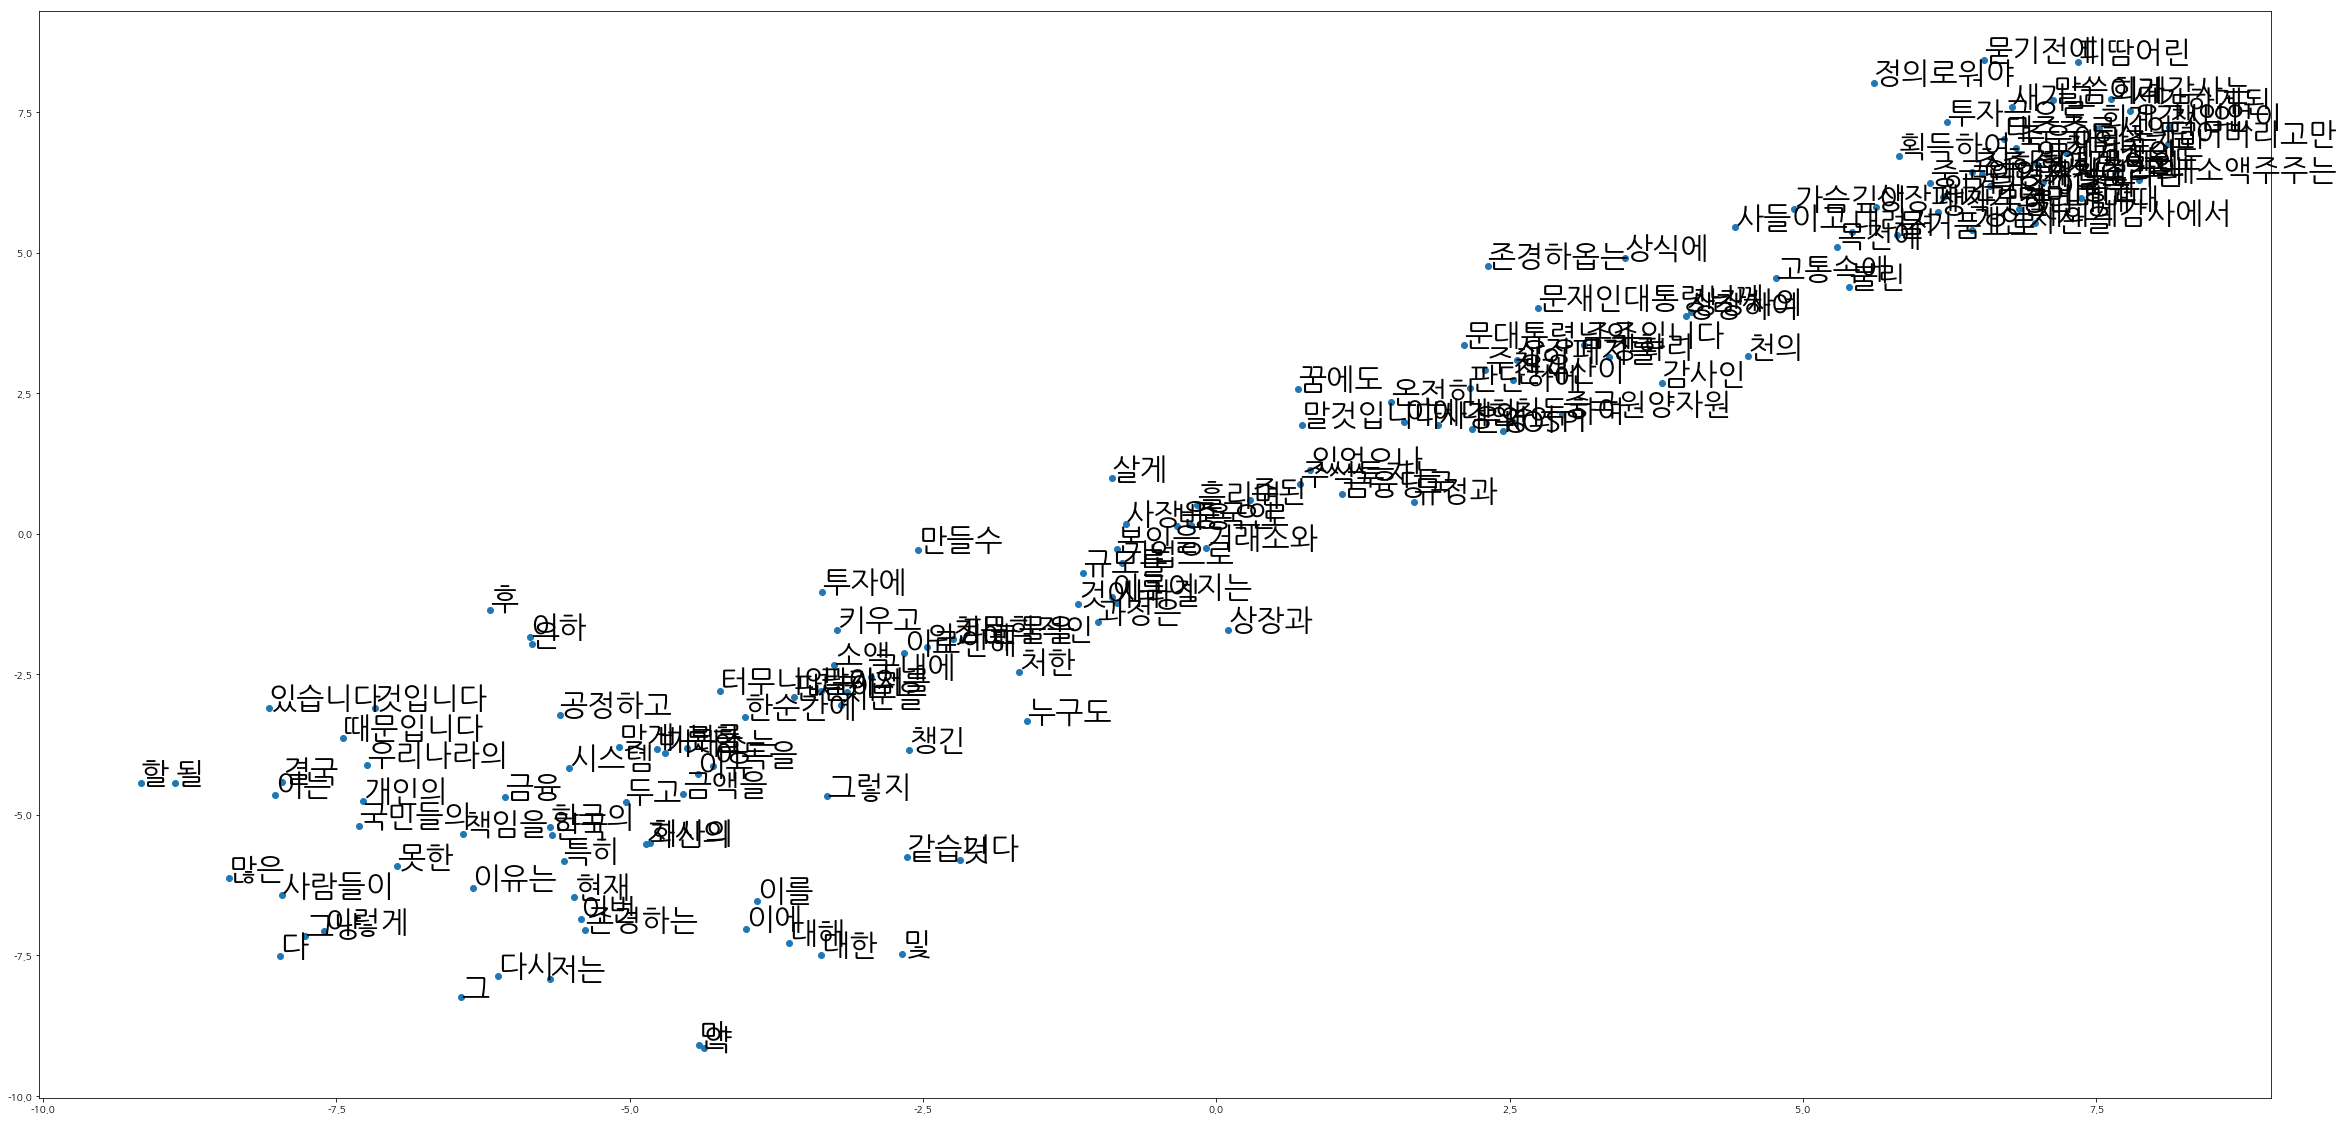

In [45]:
fig = plt.figure()
fig.set_size_inches(40, 20)
ax = fig.add_subplot(1, 1, 1)

ax.scatter(df['x'], df['y'])

for word, pos in df.iterrows():
    ax.annotate(word, pos, fontsize=30)
plt.show()